In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

In [3]:
!pip install ucimlrepo

In [4]:
### load sample dataset from pycaret dataset module
#from pycaret.datasets import get_data
#data = get_data('insurance')
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

abaloneData = pd.concat([X, y], axis=1)
abaloneData


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(abaloneData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [6]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [8]:
# init setup on exp
exp.setup(abaloneData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [9]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5170,4.5702,2.1347,0.5595,0.1721,0.1500,3.4050
gbr,Gradient Boosting Regressor,1.5183,4.6284,2.1489,0.5543,0.1730,0.1504,0.7970
rf,Random Forest Regressor,1.5406,4.7134,2.1688,0.5456,0.1753,0.1529,1.3350
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1760,0.1530,0.8910
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.6120
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1836,0.1602,0.1220
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1828,0.1603,0.0630
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1798,0.1525,0.0740
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1830,0.1603,0.7160
huber,Huber Regressor,1.5654,5.0514,2.2460,0.5144,0.1810,0.1510,0.1160


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [10]:
# compare models using OOP
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5170,4.5702,2.1347,0.5595,0.1721,0.1500,3.0920
gbr,Gradient Boosting Regressor,1.5183,4.6284,2.1489,0.5543,0.1730,0.1504,0.5180
rf,Random Forest Regressor,1.5406,4.7134,2.1688,0.5456,0.1753,0.1529,1.3120
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1760,0.1530,0.9270
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.8290
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1836,0.1602,0.0750
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1828,0.1603,0.0670
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1798,0.1525,0.1360
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1830,0.1603,0.0700
huber,Huber Regressor,1.5654,5.0514,2.2460,0.5144,0.1810,0.1510,0.1530


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

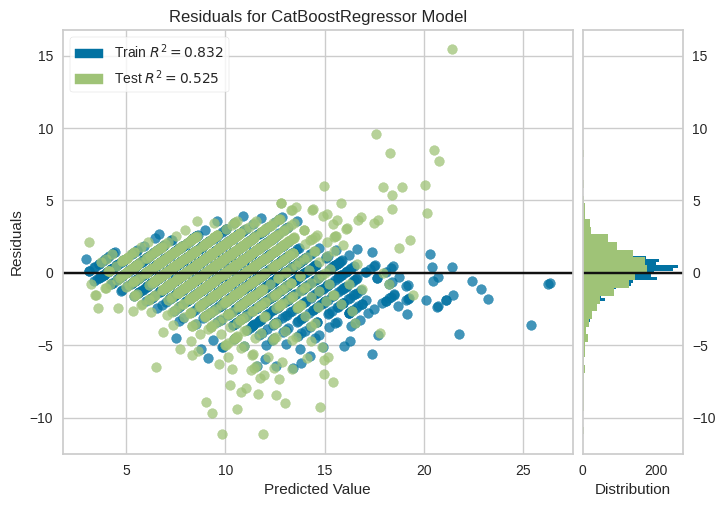

In [11]:
# plot residuals
plot_model(best, plot = 'residuals')

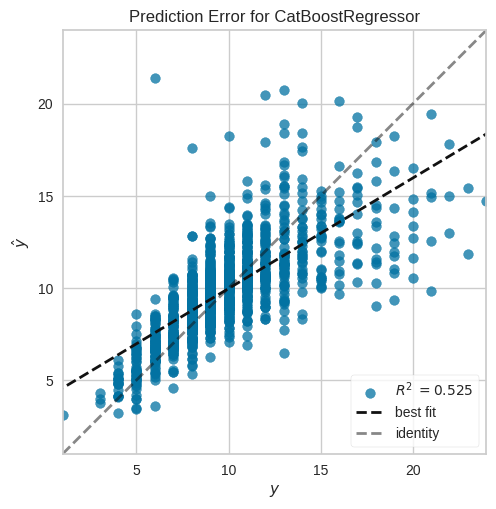

In [12]:
# plot error
plot_model(best, plot = 'error')

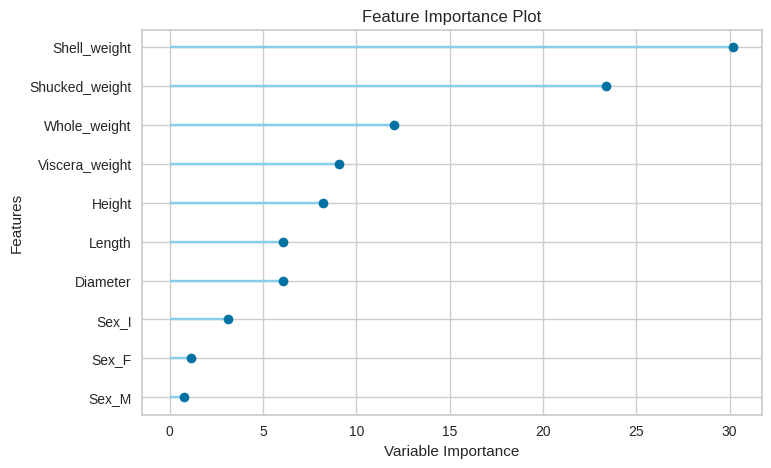

In [13]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [16]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5244,4.8480,2.2018,0.5245,0.1773,0.1528


In [17]:
# show predictions df
holdout_pred.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,5.048807
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,9.344533
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,8.765838
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,13.344065
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,12.010997


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [18]:
# copy data and drop Rings (age)

new_data = abaloneData.copy()
new_data.drop('Rings', axis=1, inplace=True)
new_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [19]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,9.852465
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.886630
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.678084
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9.763446
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6.453878


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [20]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  <catboost.core.CatBoostRegre

In [21]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x78f85b04f100>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [22]:
s = setup(abaloneData, target = 'Rings', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [23]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [24]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Sex_I,Sex_M,Sex_F,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
112,1.0,0.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,1.0,0.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,1.0,0.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,0.0,0.0,1.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,1.0,0.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,1.0,0.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,1.0,0.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,1.0,0.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,0.0,0.0,1.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [25]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [26]:
# help(setup)

In [27]:
# init setup with normalize = True
s = setup(abaloneData, target = 'Rings', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


<AxesSubplot: >

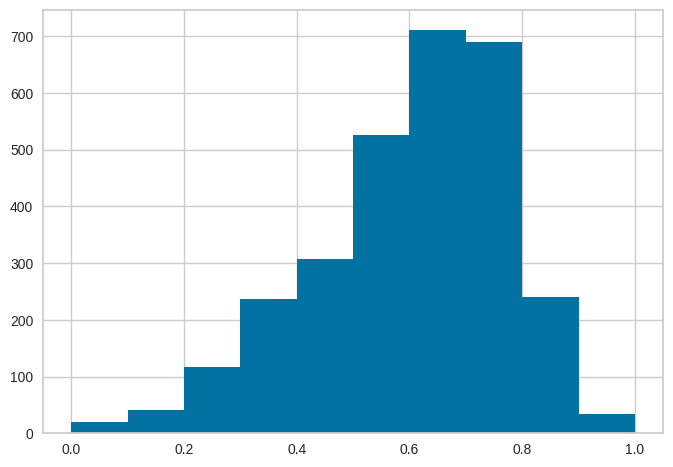

In [28]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Length'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

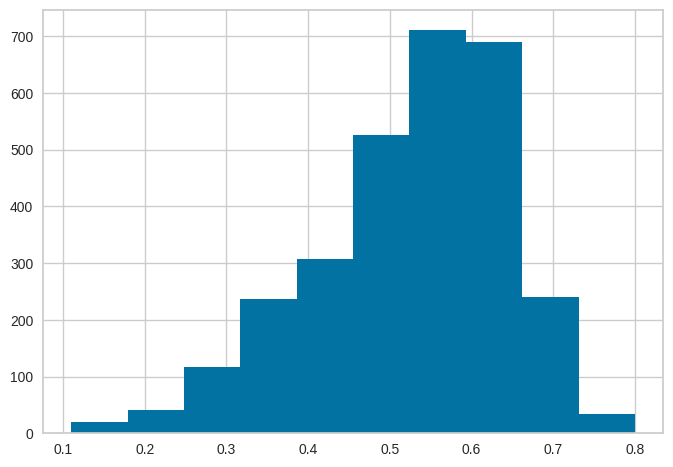

In [29]:
get_config('X_train')['Length'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [30]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,3.1530
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.4440
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.4200
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,1.0700
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.8450
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.0770
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.0860
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.1170
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1829,0.1610,0.1370
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1810


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [31]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [32]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,3.0260
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.4520
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.4350
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.8420
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.9350
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1790
dt,Decision Tree Regressor,2.0780,9.2831,3.0405,0.1001,0.2397,0.2034,0.0880


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [33]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [34]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,3.026
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.452
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.435
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,0.842
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.935
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.179
dt,Decision Tree Regressor,2.0780,9.2831,3.0405,0.1001,0.2397,0.2034,0.088


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [35]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.5174,4.5788,2.1366,0.5587,0.1722,0.1500,3.0160
gbr,Gradient Boosting Regressor,1.5185,4.6284,2.1489,0.5543,0.1730,0.1504,0.6280
rf,Random Forest Regressor,1.5408,4.7147,2.1691,0.5454,0.1754,0.1530,1.4220
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1760,0.1532,1.0580
et,Extra Trees Regressor,1.5591,4.8226,2.1947,0.5352,0.1772,0.1546,0.6730
huber,Huber Regressor,1.5651,5.0503,2.2457,0.5145,0.1810,0.1509,0.2210
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1835,0.1550,0.0960
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1829,0.1603,0.1230
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1828,0.1602,0.0960
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1830,0.1587,0.1820


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [36]:
# list of top 3 models by MAE
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [37]:
# help(compare_models)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [38]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [39]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1880,0.1668
1,1.6427,6.2469,2.4994,0.3943,0.1930,0.1689
2,1.6473,5.5216,2.3498,0.4758,0.1826,0.1587
3,1.5899,4.7723,2.1846,0.6052,0.1748,0.1544
4,1.4977,4.4391,2.1069,0.5856,0.1692,0.1460
5,1.5223,4.5549,2.1342,0.5376,0.1784,0.1546
6,1.6191,4.5836,2.1409,0.4583,0.1828,0.1630
7,1.6911,5.3691,2.3171,0.5311,0.1875,0.1646
8,1.5552,4.9599,2.2271,0.5336,0.1847,0.1637


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [40]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6099,4.9975,2.2355,0.5176,0.1880,0.1668
1,1.6427,6.2469,2.4994,0.3943,0.1930,0.1689
2,1.6473,5.5216,2.3498,0.4758,0.1826,0.1587
3,1.5899,4.7723,2.1846,0.6052,0.1748,0.1544
4,1.4977,4.4391,2.1069,0.5856,0.1692,0.1460
5,1.5223,4.5549,2.1342,0.5376,0.1784,0.1546
6,1.6191,4.5836,2.1409,0.4583,0.1828,0.1630
7,1.6911,5.3691,2.3171,0.5311,0.1875,0.1646
8,1.5552,4.9599,2.2271,0.5336,0.1847,0.1637


In [41]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6338,5.4525,2.3351,0.4847,0.1871,0.1631
1,1.5420,4.5741,2.1387,0.5680,0.1758,0.1537
2,1.6163,4.9095,2.2157,0.5209,0.1858,0.1631
Mean,1.5974,4.9787,2.2298,0.5246,0.1829,0.1600
Std,0.0398,0.3619,0.0808,0.0341,0.0051,0.0044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6112,4.9952,2.2350,0.5178,0.1880,0.1672
1,1.6436,6.2401,2.4980,0.3950,0.1935,0.1692
2,1.6461,5.5187,2.3492,0.4761,0.1826,0.1586
3,1.5893,4.7689,2.1838,0.6054,0.1748,0.1543
4,1.4943,4.4272,2.1041,0.5867,0.1690,0.1457
5,1.5237,4.5586,2.1351,0.5372,0.1786,0.1548
6,1.6183,4.5787,2.1398,0.4589,0.1828,0.1630
7,1.6917,5.3627,2.3157,0.5317,0.1878,0.1653
8,1.5502,4.9402,2.2227,0.5354,0.1846,0.1634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [43]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [44]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [45]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0478,9.3038,3.0502,0.1019,0.2483,0.2099
1,1.9898,8.5290,2.9204,0.1731,0.2319,0.1945
2,2.1058,9.6280,3.1029,0.0860,0.2416,0.1994
3,2.0925,8.8253,2.9707,0.2698,0.2381,0.2010
4,1.9144,7.8048,2.7937,0.2714,0.2274,0.1901
5,1.9178,7.6301,2.7623,0.2254,0.2266,0.1938
6,2.2911,10.4692,3.2356,-0.2373,0.2487,0.2224
7,2.0616,8.9863,2.9977,0.2152,0.2304,0.1935
8,2.1062,9.6473,3.1060,0.0928,0.2417,0.2096


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1972,0.1607
1,1.6485,6.0648,2.4627,0.4120,0.1949,0.1574
2,1.6962,6.7918,2.6061,0.3552,0.1970,0.1488
3,1.7021,6.0976,2.4693,0.4955,0.1948,0.1542
4,1.5634,5.2800,2.2978,0.5071,0.1813,0.1442
5,1.3990,4.3536,2.0865,0.5580,0.1703,0.1365
6,1.5103,4.9144,2.2168,0.4192,0.1847,0.1450
7,1.6353,6.5796,2.5651,0.4254,0.1938,0.1458
8,1.5719,6.3185,2.5137,0.4058,0.1965,0.1518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [47]:
dt

DecisionTreeRegressor(random_state=123)

In [48]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6985,6.4541,2.5405,0.3770,0.2082,0.1781
1,1.7145,5.7783,2.4038,0.4398,0.1927,0.1684
2,1.7512,6.5911,2.5673,0.3743,0.1979,0.1652
3,1.6811,5.3889,2.3214,0.5541,0.1862,0.1610
4,1.5337,4.7422,2.1777,0.5573,0.1745,0.1487
5,1.5666,5.0187,2.2402,0.4905,0.1798,0.1572
6,1.6789,5.4960,2.3444,0.3505,0.1891,0.1653
7,1.6469,5.4194,2.3280,0.5267,0.1781,0.1569
8,1.7033,6.7758,2.6030,0.3628,0.2020,0.1715


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [49]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1972,0.1607
1,1.6485,6.0648,2.4627,0.4120,0.1949,0.1574
2,1.6962,6.7918,2.6061,0.3552,0.1970,0.1488
3,1.7021,6.0976,2.4693,0.4955,0.1948,0.1542
4,1.5634,5.2800,2.2978,0.5071,0.1813,0.1442
5,1.3990,4.3536,2.0865,0.5580,0.1703,0.1365
6,1.5103,4.9144,2.2168,0.4192,0.1847,0.1450
7,1.6353,6.5796,2.5651,0.4254,0.1938,0.1458
8,1.5719,6.3185,2.5137,0.4058,0.1965,0.1518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [51]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole_weight',
                                                                          'Shucked_weight',
                                                                          'Viscera_weight',
                                                                          'Shell_weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [52]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7744,5.8579,2.4203,0.4345,0.2004,0.1841
1,1.8033,6.0474,2.4592,0.4137,0.1980,0.1764
2,1.7527,6.3882,2.5275,0.3935,0.1961,0.1663
3,1.7406,5.9409,2.4374,0.5085,0.1906,0.1634
4,1.7446,6.3452,2.5190,0.4077,0.1934,0.1645
5,1.6465,5.4830,2.3416,0.4434,0.1899,0.1646
6,1.6988,5.3009,2.3024,0.3735,0.1949,0.1709
7,1.7591,6.4079,2.5314,0.4404,0.1963,0.1690
8,1.6998,6.2452,2.4990,0.4127,0.1988,0.1713


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-12-01 23:21:58,823] Searching the best hyperparameters using 2923 samples...
[I 2023-12-01 23:22:13,562] Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [53]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [54]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5710,5.2239,2.2856,0.4957,0.1940,0.1667
1,1.5853,5.2649,2.2945,0.4895,0.1866,0.1601
2,1.6447,5.7308,2.3939,0.4559,0.1854,0.1553
3,1.6247,5.1375,2.2666,0.5749,0.1791,0.1538
4,1.5137,4.3761,2.0919,0.5915,0.1715,0.1485
5,1.5664,4.4711,2.1145,0.5461,0.1764,0.1593
6,1.6041,4.6948,2.1667,0.4452,0.1805,0.1595
7,1.6524,5.2864,2.2992,0.5383,0.1783,0.1589
8,1.6027,5.5047,2.3462,0.4823,0.1873,0.1633


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [55]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6519,5.9317,2.4355,0.4274,0.2034,0.1685
1,1.6485,5.5870,2.3637,0.4583,0.1903,0.1625
2,1.7167,6.3857,2.5270,0.3938,0.1951,0.1585
3,1.6781,6.0000,2.4495,0.5036,0.1932,0.1560
4,1.4966,4.5377,2.1302,0.5764,0.1740,0.1460
5,1.5205,5.0616,2.2498,0.4861,0.1856,0.1507
6,1.6301,5.1644,2.2725,0.3897,0.1920,0.1583
7,1.5959,5.7123,2.3900,0.5011,0.1876,0.1506
8,1.6438,6.5822,2.5656,0.3810,0.1992,0.1589


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [56]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [57]:
# top 3 models based on mae
best_mae_models_top3

 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

In [58]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4898,4.4601,2.1119,0.5695,0.1788,0.1567
1,1.5480,4.8698,2.2068,0.5279,0.1777,0.1553
2,1.5467,5.0351,2.2439,0.5220,0.1738,0.1461
3,1.5122,4.4114,2.1003,0.6350,0.1659,0.1433
4,1.3756,3.7698,1.9416,0.6481,0.1571,0.1348
5,1.4193,3.8237,1.9554,0.6118,0.1616,0.1447
6,1.5420,4.3306,2.0810,0.4882,0.1743,0.1530
7,1.5586,4.7554,2.1807,0.5847,0.1697,0.1502
8,1.5020,5.1353,2.2661,0.5171,0.1785,0.1520


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x78f838a068c0>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [59]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [60]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4936,4.4214,2.1027,0.5732,0.1764,0.1557
1,1.5364,4.6504,2.1565,0.5491,0.1782,0.1556
2,1.5176,4.9332,2.2211,0.5317,0.1717,0.1441
3,1.5002,4.2897,2.0712,0.6451,0.1645,0.1437
4,1.3834,3.7830,1.9450,0.6469,0.1563,0.1348
5,1.4365,3.8435,1.9605,0.6098,0.1628,0.1457
6,1.5438,4.2639,2.0649,0.4961,0.1740,0.1535
7,1.5661,4.7357,2.1762,0.5864,0.1721,0.1520
8,1.4597,4.7182,2.1722,0.5563,0.1744,0.1500


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x78f838a45480>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [61]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

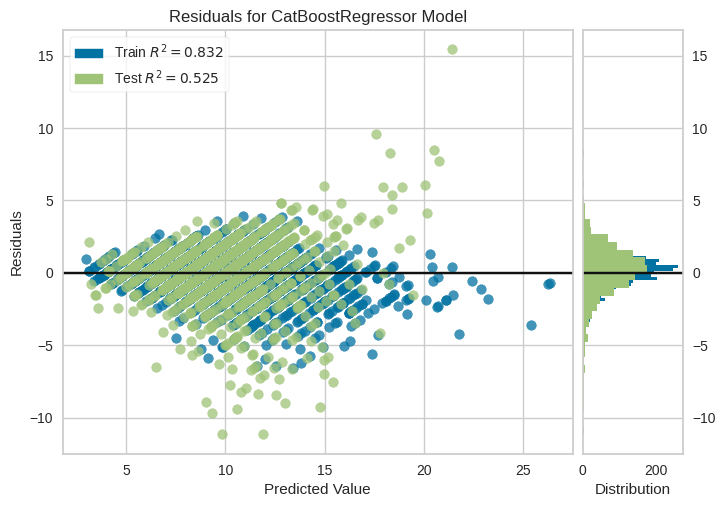

In [62]:
# plot residuals
plot_model(best, plot = 'residuals')

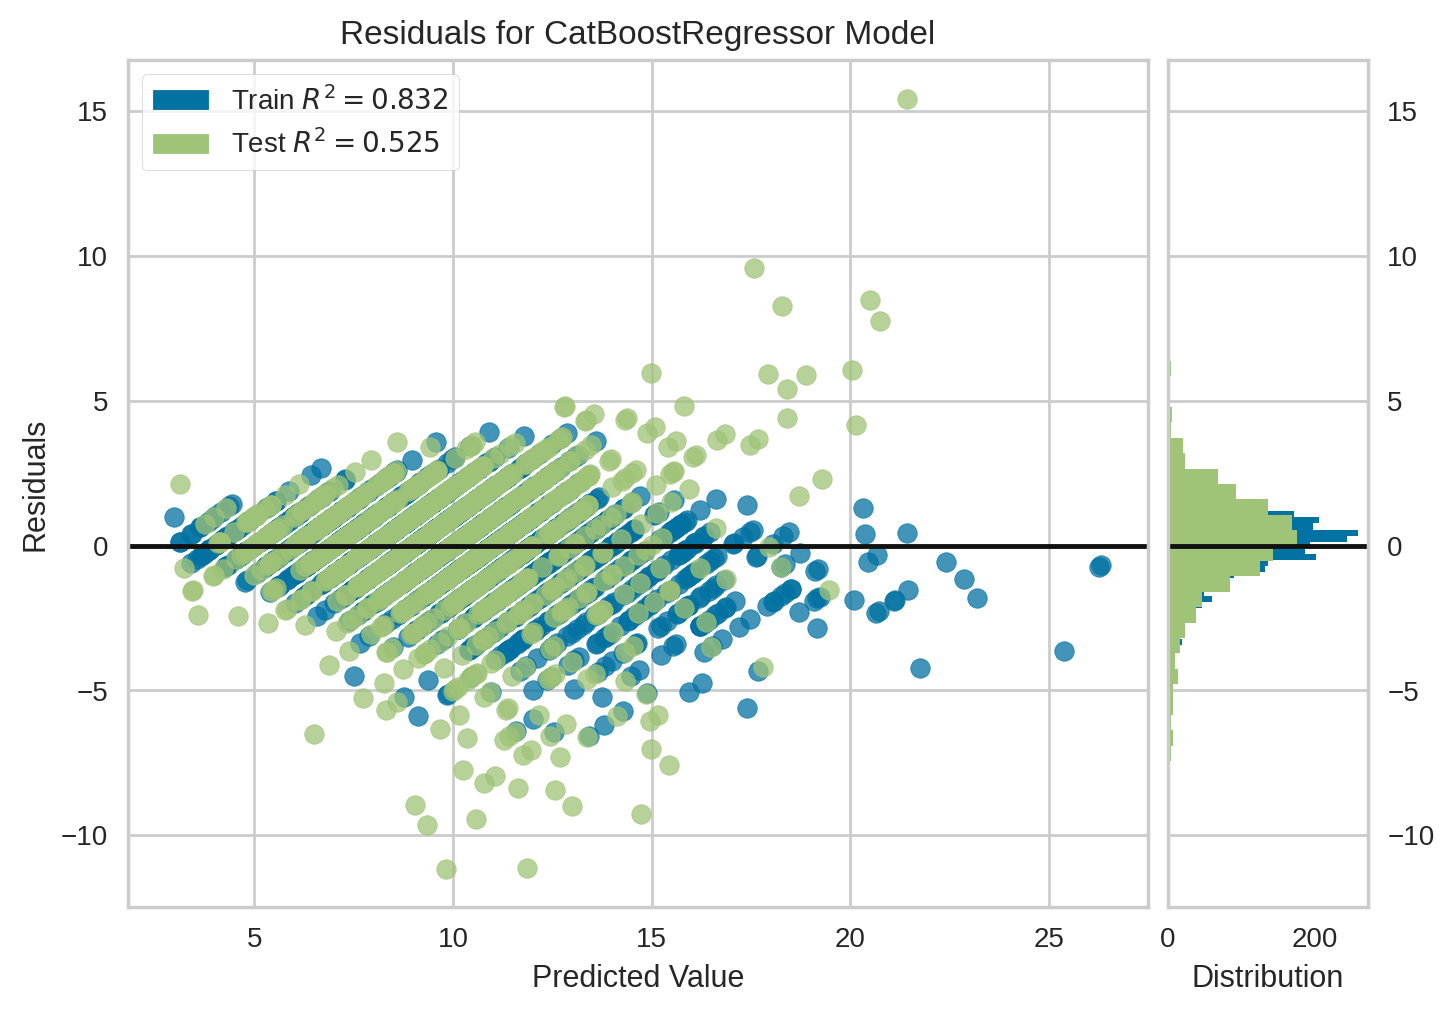

In [63]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [64]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [65]:
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plots (ID - Name):
    
       

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [66]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5663,4.7922,2.1891,0.5374,0.1849,0.1639
1,1.5784,4.9471,2.2242,0.5204,0.1798,0.1577
2,1.6313,5.3880,2.3212,0.4885,0.1792,0.1528
3,1.6187,4.9732,2.2301,0.5885,0.1760,0.1526
4,1.4582,4.1978,2.0489,0.6081,0.1645,0.1418
5,1.4168,3.8101,1.9519,0.6132,0.1624,0.1445
6,1.5823,4.7140,2.1712,0.4429,0.1802,0.1562
7,1.5982,5.0782,2.2535,0.5565,0.1774,0.1558
8,1.5047,5.2147,2.2836,0.5096,0.1819,0.1528


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

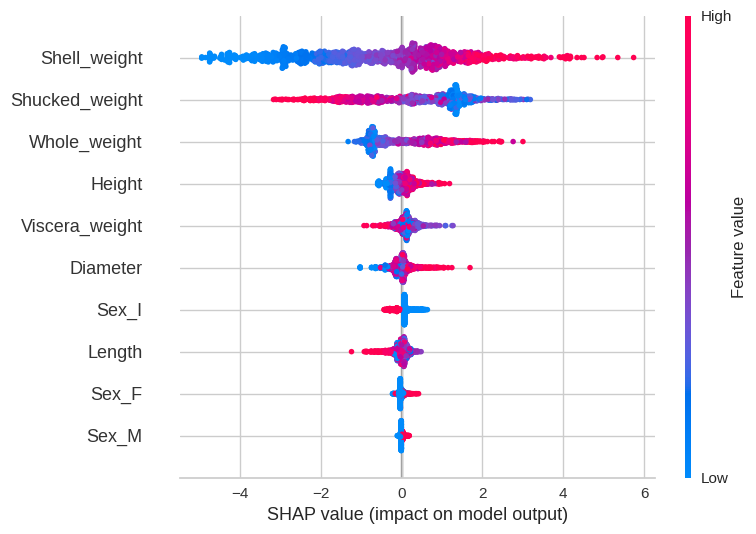

In [67]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [68]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [69]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [70]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/66 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.5997,5.0260,2.2390,0.5159,0.1828,0.1602
1,Lasso Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3643,10.4823,3.2344,-0.0037,0.2878,0.2658
2,Ridge Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.6122,5.1642,2.2688,0.5034,0.1829,0.1610
3,Elastic Net,"(TransformerWrapper(include=['Length', 'Diamet...",2.3266,10.1932,3.1893,0.0242,0.2833,0.2608
4,Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.0611,11.1576,2.9572,-0.0874,0.2420,0.2115
...,...,...,...,...,...,...,...,...
60,Bagging Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.6000,5.0905,2.2543,0.5099,0.1829,0.1590
61,AdaBoost Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.6205,5.6552,2.3748,0.4560,0.1915,0.1567
62,Voting Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",1.4994,4.5109,2.1213,0.5654,0.1709,0.1485


In [71]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 T...
                ['trained_model',
                 StackingRegressor(cv=5,
                                   estimators=[('CatBoost Regressor',
                                                <catboost.core.CatBoostRegressor object at 0x78f840752b60>),
                                               ('Gradient Boosting Regressor',
                                                GradientBoostingRegressor(random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [72]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [73]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x78f78667cbb0>),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [74]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [75]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9d7983967fa19e59f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [76]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [77]:
# !python my_first_api.py

In [78]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [79]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [80]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [81]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [82]:
final_best = finalize_model(best)

In [83]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x78f78617a380>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [84]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[9] <= 0.18637724965810776) {
            if (input[9] <= 0.09156686440110207) {
                if (input[9] <= 0.03617764450609684) {
                    if (input[8] <= 0.012837393209338188) {
                        if (input[7] <= 0.004207337740808725) {
                            if (input[7] <= 0.001514641393441707) {
                                if (input[9] <= 0.001497005927376449) {
                                    var0 = 3.0;
                                } else {
                                    var0 = 2.0;
                                }
                            } else {
                                if (input[5] <= 0.02433628309518099) {
                                    var0 = 4.0;
                                } else {
                                    if (input[7] <= 0.0018512284732423723) {
                                        var0 = 

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [85]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [86]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [87]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
 

In [88]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x78f785c39fc0>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [89]:
# save experiment
save_experiment('my_experiment')

In [92]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=abaloneData)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True
